In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from langchain_community.llms.ollama import Ollama

# Plasticity of the Model tests

Here can be used to view how each model outputs a response. Can be used to do a personal preference assessment of each output as a first step.

In [ ]:
example_prompts = ["is the sky blue", "Hello", "I need help with staying healthy"]
model_names = [f"hal{i}000:latest" for i in range(0,11)]
for model in model_names:
    llm=Ollama(model=model)
    out1=llm.invoke(example_prompts[2])
    #print(f"{model} answered: {out1}\n{"*"*20}\n{"#"*20}")


# Get Data

We load the data which contains responses for prompts in *prompts.json* for all selected models with tuned system prompts. For each prompt also includes time taken to respond.

Following models are used:
1. phi2:2.7
2. phi2:chat
3. llama2:7b
4. llama2:7b:chat
5. llava2:7b
6. llava2:13b
7. mistral:7b:instruct
8. mistral:7b:latest
9. neural-chat:7b
10. tinyllama:1.1b:chat
11. gemma:2b:instruct

In [3]:
with open("./ollama_out.json", "r") as file:
    json_data = json.load(file)
df = pd.DataFrame(json_data)
df['model_names'] = df['model_names'].str.replace(":latest","")
replacements = {
    'hal0000': 'phi2:2.7',
    'hal1000': 'phi2:chat',
    'hal2000': 'llama2:7b',
    'hal3000': 'llama2:7b:chat',
    'hal4000': 'llava2:7b',
    'hal5000': 'llava2:13b',
    'hal6000': 'mistral:7b:instruct',
    'hal7000': 'mistral:7b:latest',
    'hal8000': 'neural-chat:7b',
    'hal9000': 'tinyllama:1.1b:chat',
    'hal10000': 'gemma:2b:instruct'
}

df['model_names'] = df['model_names'].replace(replacements)
print(df.columns)

Index(['model_names', 'prompt_ids', 'prompt_texts', 'prompt_responses',
       'prompt_times'],
      dtype='object')


In [4]:
def get_word_count(sentence):
    return len(sentence.split(" ")) 

In [5]:
model_names = df["model_names"].unique()
df["prompt_responses_len"] = df["prompt_responses"].apply(get_word_count)
df["wps"] = df["prompt_responses_len"] / df["prompt_times"]

for model in model_names:
    path = df["model_names"] == model

    mean_time = df[path]["prompt_times"].mean()
    mean_responses_len = df[path]["prompt_responses_len"].mean()    
    mean_wps = df[path]["wps"].mean()

    print(f"""
{model} mean statistics
-- {mean_time:.2f} seconds
-- {mean_responses_len:.2f} words
-- {mean_wps:.2f} words per second""")


phi2:2.7 mean statistics
-- 12.37 seconds
-- 482.22 words
-- 39.32 words per second

phi2:chat mean statistics
-- 12.46 seconds
-- 503.76 words
-- 41.16 words per second

llama2:7b mean statistics
-- 2.06 seconds
-- 38.02 words
-- 14.62 words per second

llama2:7b:chat mean statistics
-- 3.25 seconds
-- 54.51 words
-- 13.93 words per second

llava2:7b mean statistics
-- 2.79 seconds
-- 55.04 words
-- 19.80 words per second

llava2:13b mean statistics
-- 1.66 seconds
-- 19.67 words
-- 10.44 words per second

mistral:7b:instruct mean statistics
-- 5.17 seconds
-- 78.42 words
-- 15.18 words per second

mistral:7b:latest mean statistics
-- 5.35 seconds
-- 83.73 words
-- 15.66 words per second

neural-chat:7b mean statistics
-- 2.82 seconds
-- 51.73 words
-- 16.81 words per second

tinyllama:1.1b:chat mean statistics
-- 1.57 seconds
-- 141.69 words
-- 90.50 words per second

gemma:2b:instruct mean statistics
-- 1.22 seconds
-- 55.62 words
-- 44.88 words per second


# Analysis on:

* inference speed
* response length
* word count per second

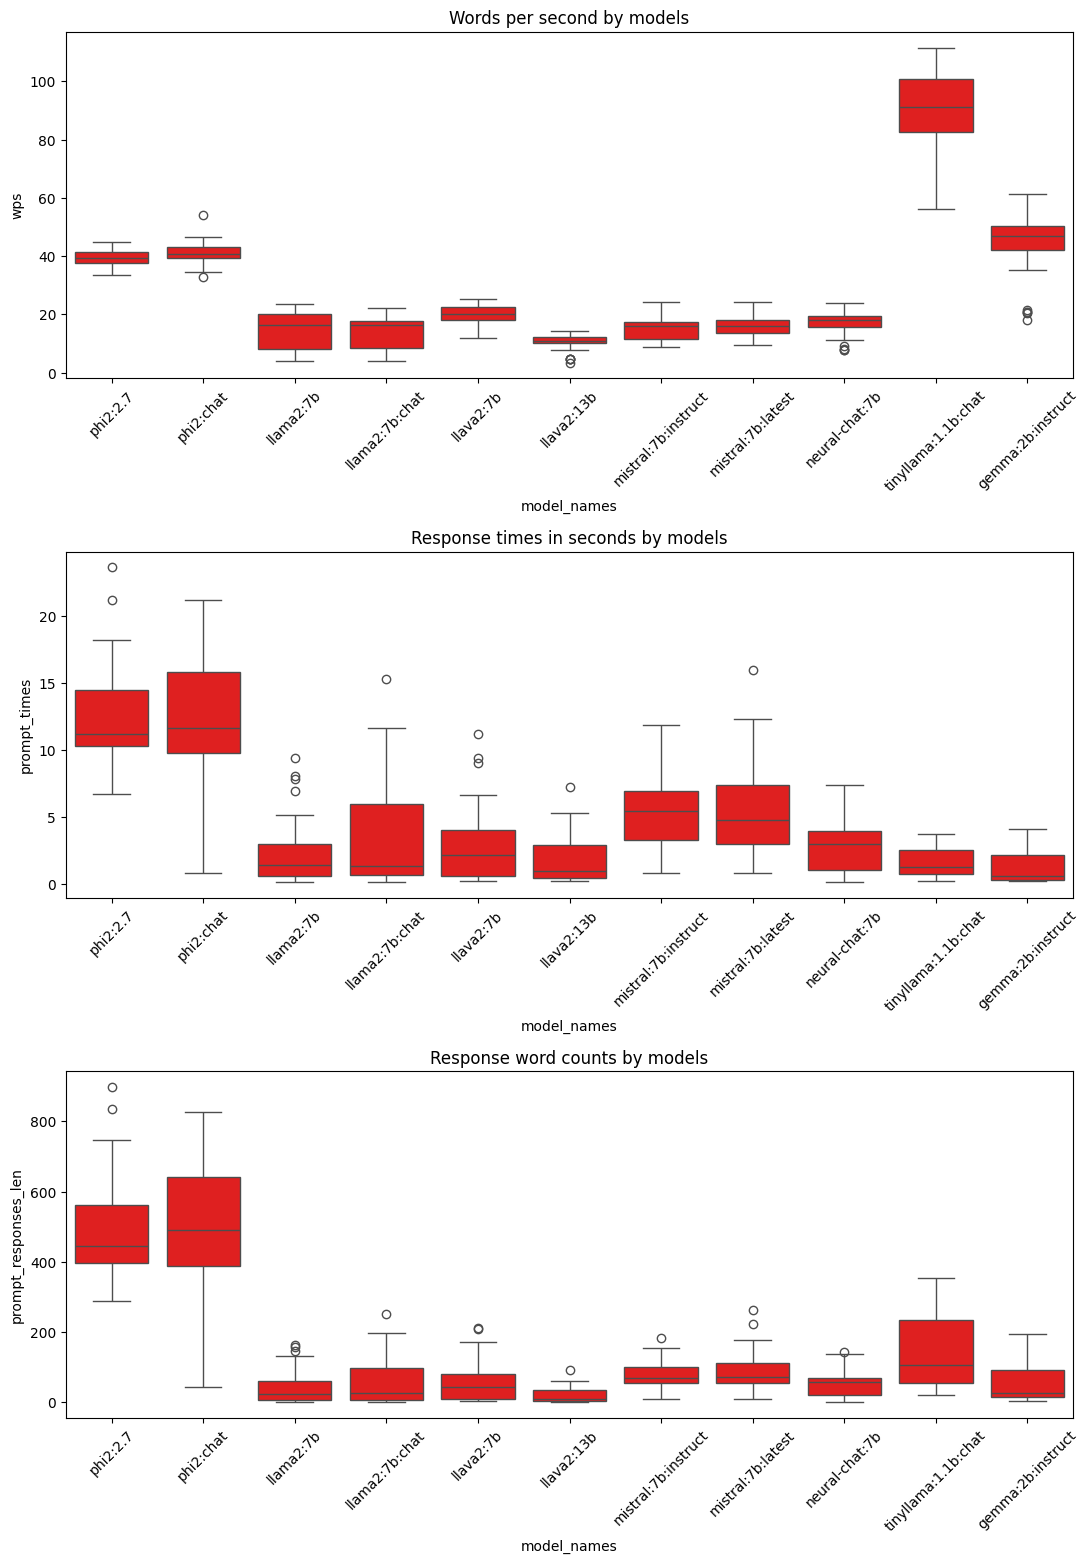

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

ENABLE_LOG_SCALE = False
fig, ax = plt.subplots(3, 1, figsize=(13, 18))

# Data for each subplot
plots_data = [
    ('model_names', 'wps', "Words per second by models"),
    ('model_names', 'prompt_times', "Response times in seconds by models"),
    ('model_names', 'prompt_responses_len', "Response word counts by models")
]

# Iterate over each subplot and apply settings
for idx, (x, y, title) in enumerate(plots_data):
    sns.boxplot(x=x, y=y, data=df, ax=ax[idx], color="red")
    ax[idx].tick_params(rotation=45, axis="x")
    ax[idx].set_title(title)
    
    # Apply log scale if enabled
    if ENABLE_LOG_SCALE:
        ax[idx].set_yscale('log')

plt.subplots_adjust(hspace=0.5)
plt.show()


# OLD PART

# Load Data

In [ ]:
#with open("./ollama_out.json", 'r') as file:
#    json_data = json.load(file)

# Create Dataframe

In [ ]:
"""base_names = ["phi2:2.7", "phi2:chat", "llama2:7b", "llama2:7b:chat", "llava2:7b", "llava2:13b", "mistral:7b:instruct", "mistral:7b:latest", "neural-chat:7b", "tinyllama:1.1b:chat", "gemma:2b:instruct"]
new_names = []
for key in json_data.keys():
    new_names.append(f"{key}")
    
data = {"mean":[None for i in range(11)],
    "max":[None for i in range(11)],
    "min":[None for i in range(11)],
    "std":[None for i in range(11)],
    "median":[None for i in range(11)],
    "variance":[None for i in range(11)]}

df_speed = pd.DataFrame(data=data, index=new_names)
prompts = [f"prompt_{i}" for i in range(9)]
for model_name in json_data.keys():
    mean_time= []
    max_time = []
    min_time = []
    std_time = []
    median_time = []
    variance_time = []
    for prompt in prompts:
        stats = json_data[model_name][model_name][prompt]['time_ls']
        mean_time.append(np.mean(stats))
        max_time.append(np.max(stats))
        min_time.append(np.min(stats))
        std_time.append(np.std(stats))
        median_time.append(np.median(stats))
        variance_time.append(np.var(stats))
    df_speed.loc[model_name, "mean"] = np.mean(mean_time)
    df_speed.loc[model_name, "max"] = np.mean(max_time)
    df_speed.loc[model_name, "min"] = np.mean(min_time)
    df_speed.loc[model_name, "std"] = np.mean(std_time)
    df_speed.loc[model_name, "median"] = np.mean(median_time)
    df_speed.loc[model_name, "variance"] = np.mean(variance_time)"""

In [ ]:
"""print(df_speed)"""